### KNJIGE


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
podatki = pd.read_csv("gutenberg_books.csv")

#prvih 10 podatkov
podatki.head(10).drop(columns=["url"])

,title,author,release_date,language,reading_level,downloads_last_30d
0,The Interesting Narrative of the Life of Olaud...,Olaudah Equiano,"Mar 17, 2005",English,Plain English. Easily understood.,5931
1,"How I found Livingstone : Travels, adventures...",Henry M. Stanley,"Feb 1, 2004",English,Plain English. Easily understood.,1249
2,"The History of the Rise, Progress and Accompli...",Thomas Clarkson,"Jan 1, 2004",English,Difficult to read.,1197
3,Missionary Travels and Researches in South Africa,David Livingstone,"Feb 11, 2006",English,Difficult to read.,1158
4,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Sep 7, 2005",English,Fairly difficult to read.,938
5,"Travels in West Africa: Congo Français, Corisc...",Mary Henrietta Kingsley,"Jun 1, 2004",English,Fairly difficult to read.,878
6,The Suppression of the African Slave Trade to ...,W. E. B. Du Bois,"Feb 7, 2006",English,Fairly difficult to read.,800
7,The Story of an African Farm,Olive Schreiner,"Sep 1, 1998",English,Fairly easy to read.,778
8,Travels in the Interior of Africa — Volume 01,Mungo Park,"Mar 1, 2004",English,Difficult to read.,711
9,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Nov 8, 2005",English,Fairly difficult to read.,669


In [38]:
#zadnjih 10 podatkov
podatki.tail(10).drop(columns=["url"])

,title,author,release_date,language,reading_level,downloads_last_30d
166,The Idiot,Fyodor Dostoyevsky,"May 1, 2001",English,Plain English. Easily understood.,17720
167,Through the Looking-Glass,Lewis Carroll,"Jun 25, 2008",English,Fairly easy to read.,17114
168,Around the World in Eighty Days,Jules Verne,"Jan 1, 1994",English,Plain English. Easily understood.,16995
169,"Poems by Emily Dickinson, Three Series, Complete",Emily Dickinson,"May 1, 2004",English,Plain English. Easily understood.,10678
170,The Raven,Edgar Allan Poe,"Nov 30, 2005",English,Plain English. Easily understood.,2046
171,"Curiosities of Literature, Vol. 2",Isaac Disraeli,"Jul 24, 2005",English,Fairly difficult to read.,1230
172,The Complete Poetical Works of Henry Wadsworth...,Henry Wadsworth Longfellow,"Jun 1, 1998",English,Plain English. Easily understood.,1159
173,The Complete Works of Robert Burns: Containing...,Robert Burns and Allan Cunningham,"Jun 4, 2006",English,Fairly difficult to read.,999
174,"Curiosities of Literature, Vol. 1",Isaac Disraeli,"May 26, 2007",English,Difficult to read.,963
175,Bibliomania; or Book-Madness,Thomas Frognall Dibdin,"Apr 8, 2009",English,Difficult to read.,963


In [39]:
# Ime in ocena gledalcev in kritikov
podatki[['title','author', 'release_date', 'reading_level']]

,title,author,release_date,reading_level
0,The Interesting Narrative of the Life of Olaud...,Olaudah Equiano,"Mar 17, 2005",Plain English. Easily understood.
1,"How I found Livingstone : Travels, adventures...",Henry M. Stanley,"Feb 1, 2004",Plain English. Easily understood.
2,"The History of the Rise, Progress and Accompli...",Thomas Clarkson,"Jan 1, 2004",Difficult to read.
3,Missionary Travels and Researches in South Africa,David Livingstone,"Feb 11, 2006",Difficult to read.
4,"The Last Journals of David Livingstone, in Cen...",David Livingstone,"Sep 7, 2005",Fairly difficult to read.
...,...,...,...,...
171,"Curiosities of Literature, Vol. 2",Isaac Disraeli,"Jul 24, 2005",Fairly difficult to read.
172,The Complete Poetical Works of Henry Wadsworth...,Henry Wadsworth Longfellow,"Jun 1, 1998",Plain English. Easily understood.
173,The Complete Works of Robert Burns: Containing...,Robert Burns and Allan Cunningham,"Jun 4, 2006",Fairly difficult to read.
174,"Curiosities of Literature, Vol. 1",Isaac Disraeli,"May 26, 2007",Difficult to read.


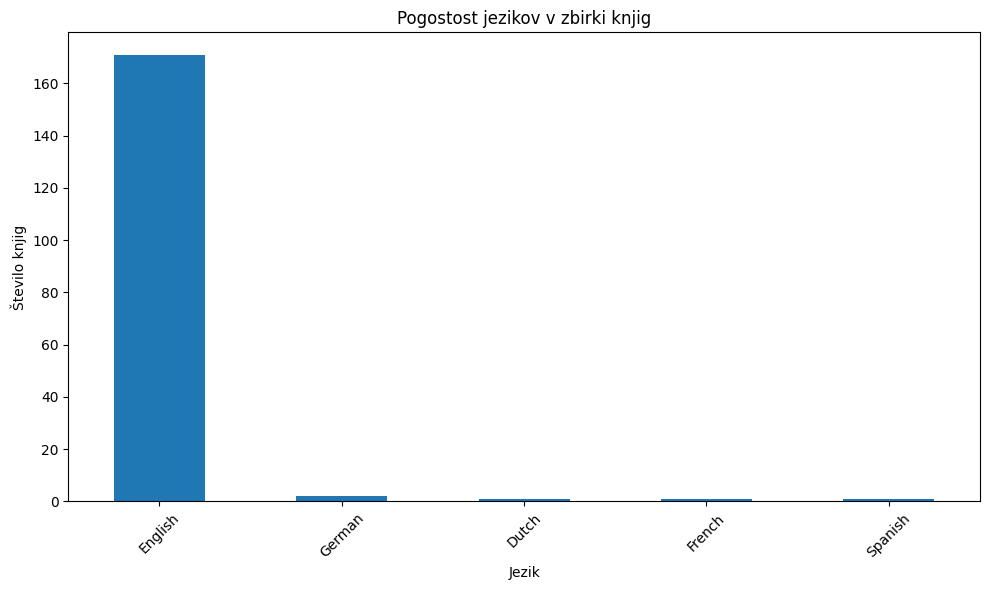

In [40]:
#pogostos jezikov
jeziki = podatki["language"].value_counts()
plt.figure(figsize=(10,6))
jeziki.plot(kind="bar")
plt.title("Pogostost jezikov v zbirki knjig")
plt.xlabel("Jezik")
plt.ylabel("Število knjig")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ugotovili smo, da je velika večina knjig v angleškem jeziku.

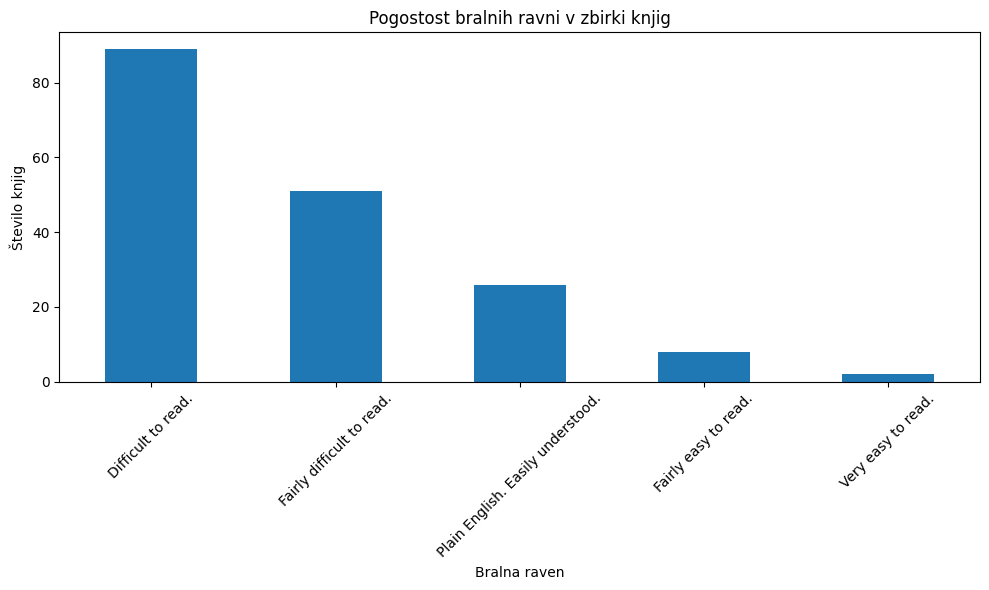

In [41]:
# pogostost bralnih ravni
ravni = podatki["reading_level"].value_counts()
plt.figure(figsize=(10,6))
ravni.plot(kind="bar")
plt.title("Pogostost bralnih ravni v zbirki knjig")
plt.xlabel("Bralna raven")
plt.ylabel("Število knjig")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

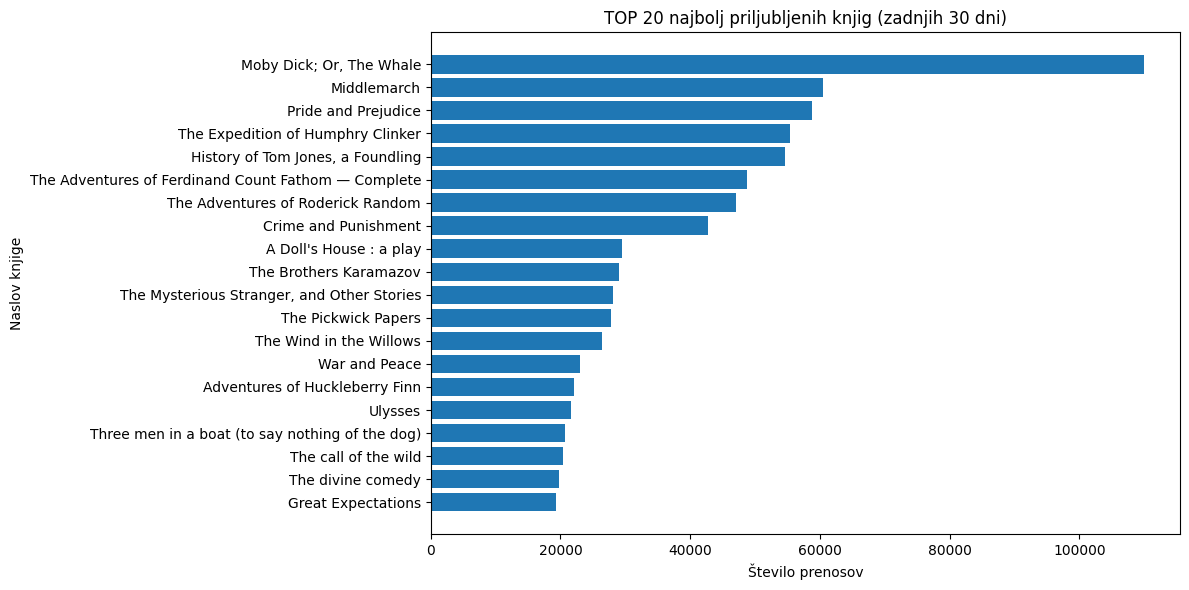

In [45]:
# razvrsti po številu prenosov in vzemi top 20
top_knjige = podatki.sort_values("downloads_last_30d", ascending=False).head(20)
plt.figure(figsize=(12,6))
plt.barh(top_knjige["title"], top_knjige["downloads_last_30d"])
plt.title("TOP 20 najbolj priljubljenih knjig (zadnjih 30 dni)")
plt.xlabel("Število prenosov")
plt.ylabel("Naslov knjige")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

Najbolj priljubljena knjiga je Moby Dick; Or. The Whale